<a href="https://colab.research.google.com/github/aarohishaiva/AirBNB-Data-Analysis-project-3/blob/main/Project_3_AirBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
Airbnb_df = pd.read_csv("/content/drive/MyDrive/Air_bnb_data.csv")
Airbnb_df

,Unnamed: 0,_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,...,guests_included,images,host,address,availability,review_scores,reviews,weekly_price,monthly_price,reviews_per_month
0,0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,NaN,"Murphy bed, optional second bedroom available....","Murphy bed, optional second bedroom available....",Great neighborhood - many terrific restaurants...,"My cat, Samantha, are in and out during the su...","Conveniently located near 1, 2, 3, B & C subwa...",...,1.0,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '454250', 'host_url': 'https://www...","{'street': 'New York, NY, United States', 'sub...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '4351675', 'date': '2013-04-29 04:00:...",NaN,NaN,NaN
1,1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,NaN,We are on the central city Blue mosque 5 minu...,We are on the central city Blue mosque 5 minu...,Cankurtaran mahallesi akbıyık caddesi no 22 Su...,NaN,Tram 5 minutes metro 10 minutes Bus 10 minutes,...,1.0,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '52004703', 'host_url': 'https://w...","{'street': 'Fatih , İstanbul, Turkey', 'suburb...","{'availability_30': 30, 'availability_60': 60,...","{'review_scores_accuracy': 9, 'review_scores_c...","[{'_id': '149469150', 'date': '2017-05-04 04:0...",NaN,NaN,NaN
2,2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",NaN,"Clean, fully furnish, Spacious 1 bedroom flat ...",NaN,NaN,NaN,...,1.0,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51624384', 'host_url': 'https://w...","{'street': 'Hong Kong, Hong Kong Island, Hong ...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '56904633', 'date': '2015-12-19 05:00...",5000.0,NaN,NaN
3,3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"The house is old fashion type, and paint the w...",House is located 5mins walk from Sham Shui Po ...,"Cheapest food, electronic device, clothing and...",Deposit of $1000 will be charged and will retu...,"Close to 3 different MTR Station, Sham shui Po...",...,1.0,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51744313', 'host_url': 'https://w...","{'street': 'Hong Kong , 九龍, Hong Kong', 'subur...","{'availability_30': 14, 'availability_60': 24,...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '57191745', 'date': '2015-12-22 05:00...",1350.0,5000.0,NaN
4,4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...",Comfortable studio with a great layout. The ba...,"This spacious, light filled studio has everyth...",Surry Hills is a vibrant eclectic community an...,"WiFi, Apple TV with Netflix App (for use with ...",Travel Card 'Opal' travel cards work on all Sy...,...,1.0,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '13764143', 'host_url': 'https://w...","{'street': 'Surry Hills, NSW, Australia', 'sub...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '123549502', 'date': '2016-12-29 05:0...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,NaN,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,NaN,NaN,NaN,...,1.0,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51303748', 'host_url': 'https://w...","{'street': 'Kadıköy, İstanbul, Turkey', 'subur...","{'availability_30': 30, 'availabil

In [5]:
print(Airbnb_df.columns)


Index(['Unnamed: 0', '_id', 'listing_url', 'name', 'summary', 'space',
       'description', 'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'property_type', 'room_type', 'bed_type',
       'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'first_review', 'last_review',
       'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'guests_included', 'images', 'host', 'address',
       'availability', 'review_scores', 'reviews', 'weekly_price',
       'monthly_price', 'reviews_per_month'],
      dtype='object')


In [7]:
# Clean column names
Airbnb_df.columns = Airbnb_df.columns.str.strip()
print("Cleaned Columns:", Airbnb_df.columns)

Cleaned Columns: Index(['Unnamed: 0', '_id', 'listing_url', 'name', 'summary', 'space',
       'description', 'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'property_type', 'room_type', 'bed_type',
       'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'first_review', 'last_review',
       'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'guests_included', 'images', 'host', 'address',
       'availability', 'review_scores', 'reviews', 'weekly_price',
       'monthly_price', 'reviews_per_month'],
      dtype='object')


In [12]:
# Clean and convert columns
# Replace '$' and ',' in price-related columns and convert to float
for col in ['price', 'security_deposit', 'cleaning_fee', 'extra_people', 'weekly_price', 'monthly_price']:
    if col in Airbnb_df.columns:
        Airbnb_df[col] = Airbnb_df[col].replace('[\$,]', '', regex=True).astype(float)
    else:
        print(f"{col} column not found")

In [13]:
# Handle 'guests_included'
if 'guests_included' in Airbnb_df.columns:
    Airbnb_df['guests_included'] = Airbnb_df['guests_included'].astype(float)
else:
    print("guests_included column not found")

In [16]:
# Handle 'review_scores'
import ast # Import the ast module to use literal_eval

if 'review_scores' in Airbnb_df.columns: # Changed df to Airbnb_df
    # Convert string representation of dictionary to actual dictionary
    Airbnb_df['review_scores'] = Airbnb_df['review_scores'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Extract individual review scores
    for score_key in ['accuracy', 'cleanliness', 'checkin', 'communication', 'location', 'value']:
        Airbnb_df[f'review_scores_{score_key}'] = Airbnb_df['review_scores'].apply(lambda x: x.get(f'review_scores_{score_key}', None) if isinstance(x, dict) else None)

    # Optionally drop the original 'review_scores' column if no longer needed
    Airbnb_df.drop(columns=['review_scores'], inplace=True)
else:
    print("review_scores column not found")

Exploratory Data Analysis (EDA)
Distribution of Prices

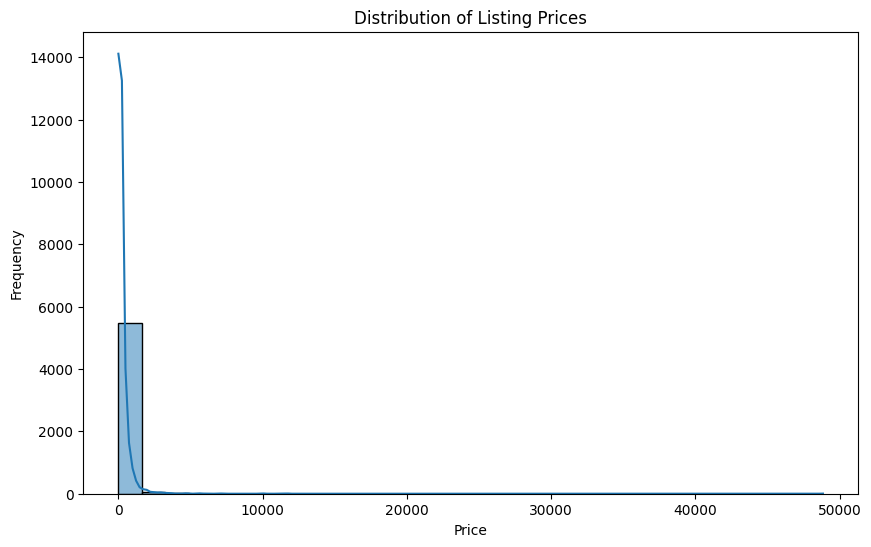

In [18]:
# Example of exploratory data analysis (EDA)
# Distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(Airbnb_df['price'], bins=30, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Word Cloud of Listing Descriptions

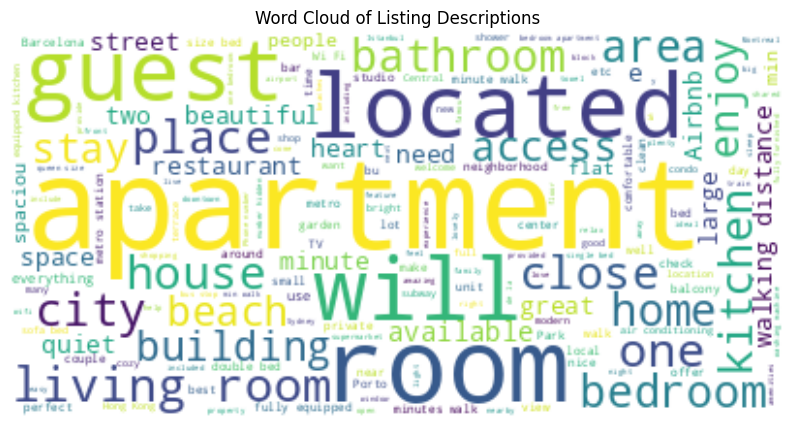

In [22]:
# Original code
#text = ' '.join(df['description'].dropna())

# Corrected code
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS # Import the WordCloud class and STOPWORDS

text = ' '.join(Airbnb_df['description'].dropna())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Listing Descriptions')
plt.show()

Visualization with Plotly

In [26]:
# Import the plotly.express module
import plotly.express as px


fig = px.histogram(Airbnb_df, x='price', nbins=30, title='Distribution of Listing Prices')
fig.update_layout(xaxis_title='Price', yaxis_title='Frequency')
fig.show()


 Checking for Missing Values

In [28]:
print("Missing values in DataFrame:")
print(Airbnb_df.isnull().sum())


Missing values in DataFrame:
Unnamed: 0                        0
_id                               0
listing_url                       0
name                              8
summary                         258
space                          1626
description                      95
neighborhood_overview          2241
notes                          3081
transit                        2232
access                         2453
interaction                    2478
house_rules                    2285
property_type                     0
room_type                         0
bed_type                          0
minimum_nights                    0
maximum_nights                    0
cancellation_policy               0
last_scraped                      0
calendar_last_scraped             0
first_review                   1388
last_review                    1388
accommodates                      0
bedrooms                          5
beds                             13
number_of_reviews                 0

. Dropping Duplicates

In [30]:
Airbnb_df.drop_duplicates(inplace=True)


Saving Cleaned Data

In [32]:
cleaned_file_path = "/content/drive/MyDrive/Air_bnb_data_cleaned.csv"
Airbnb_df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to /content/drive/MyDrive/Air_bnb_data_cleaned.csv


 Price Analysis by Property Type

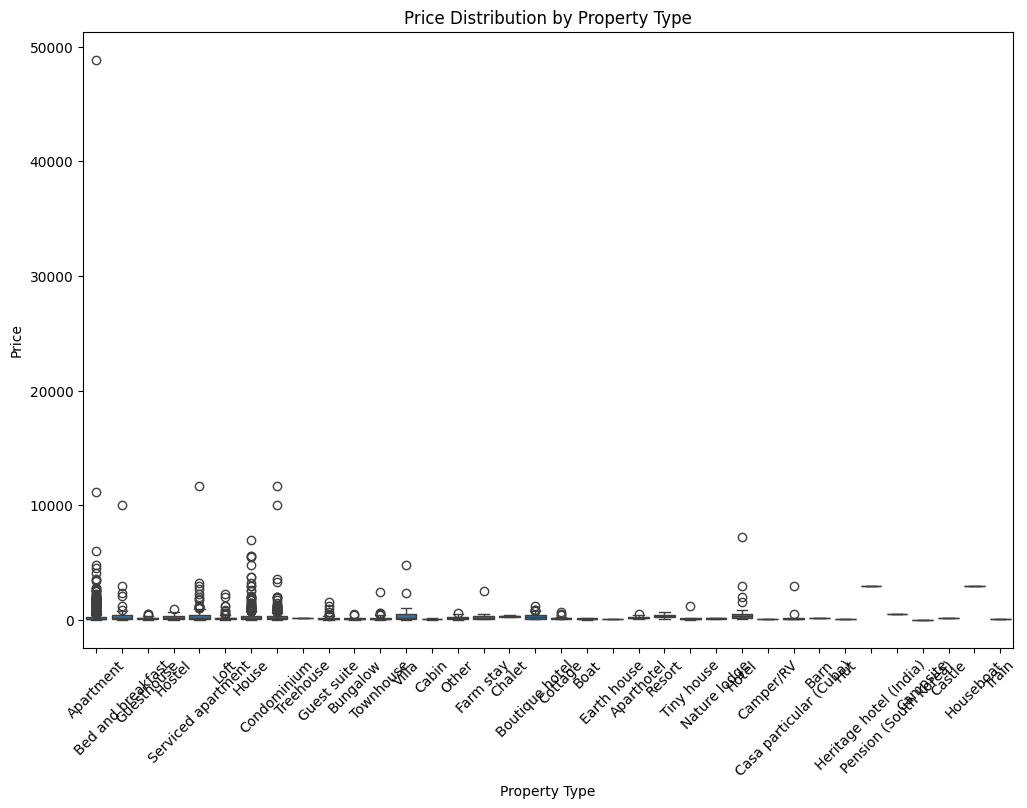

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='property_type', y='price', data=Airbnb_df)
plt.title('Price Distribution by Property Type')
plt.xticks(rotation=45)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()


Price Analysis by Room Type

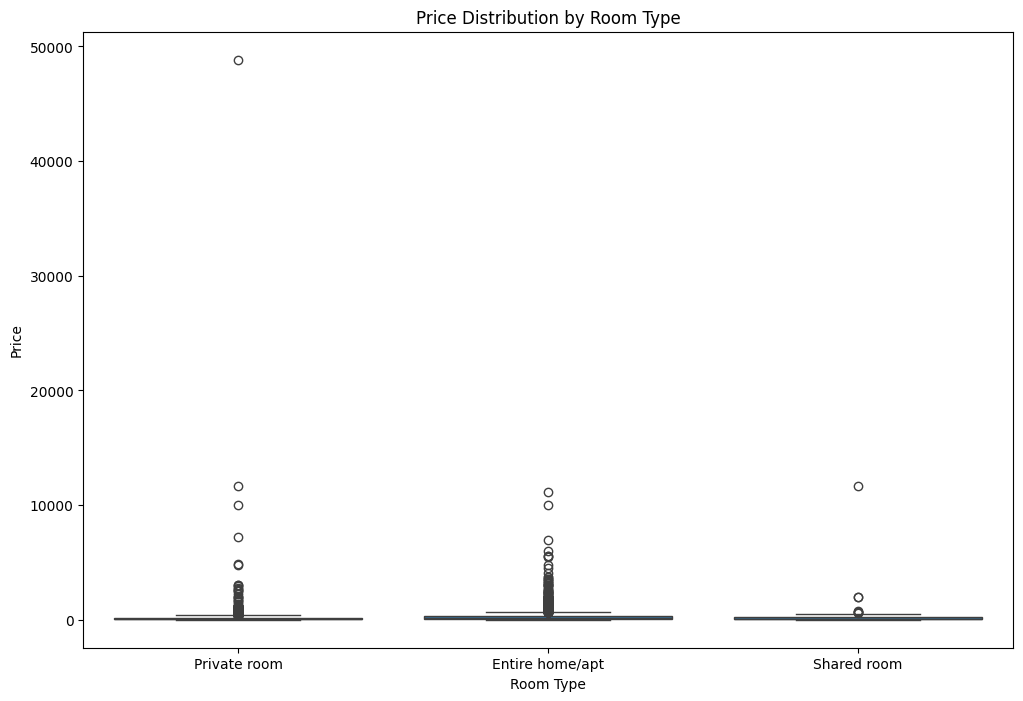

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type', y='price', data=Airbnb_df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


Availability Analysis

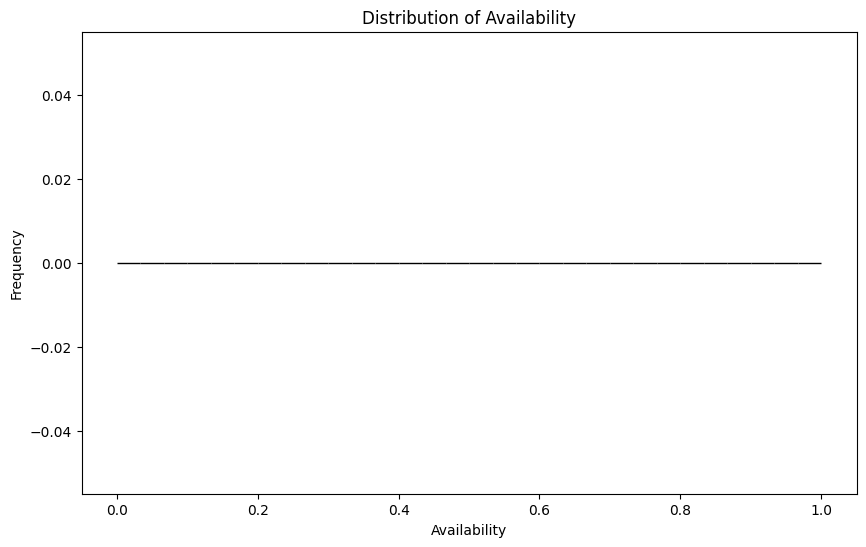

In [38]:
if 'availability' in Airbnb_df.columns:
    Airbnb_df['availability'] = Airbnb_df['availability'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    plt.figure(figsize=(10, 6))
    sns.histplot(Airbnb_df['availability'], bins=30, kde=True)
    plt.title('Distribution of Availability')
    plt.xlabel('Availability')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("availability column not found")


Review Scores Analysis

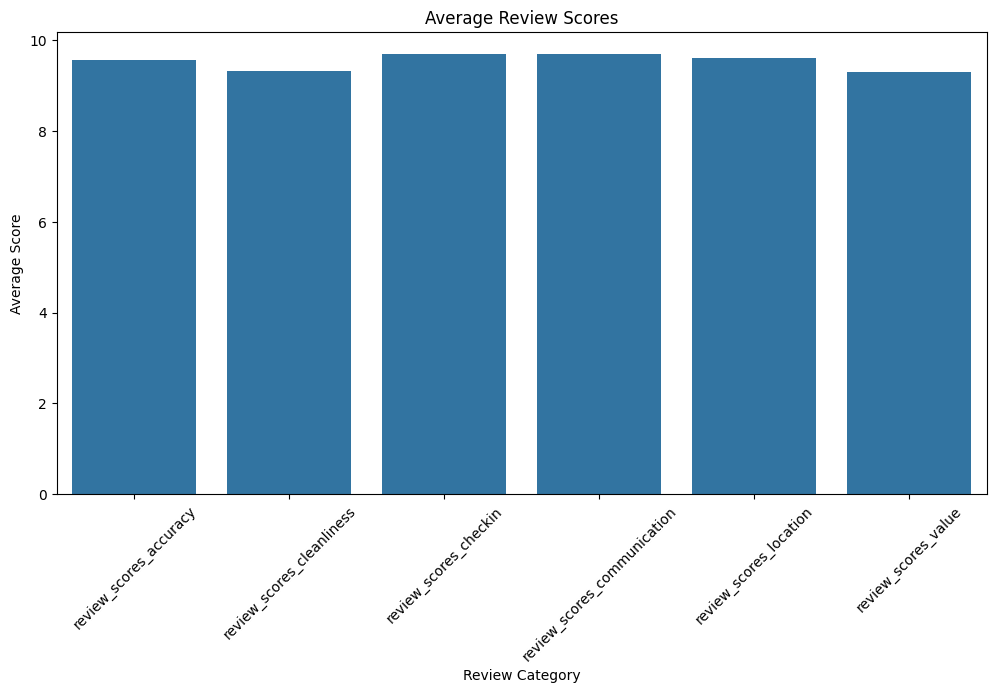

In [40]:
review_score_columns = [col for col in Airbnb_df.columns if col.startswith('review_scores_')]
if review_score_columns:
    review_scores_df = Airbnb_df[review_score_columns].dropna()

    avg_scores = review_scores_df.mean()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_scores.index, y=avg_scores.values)
    plt.title('Average Review Scores')
    plt.xlabel('Review Category')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No review scores columns found")


Price Analysis Over Time

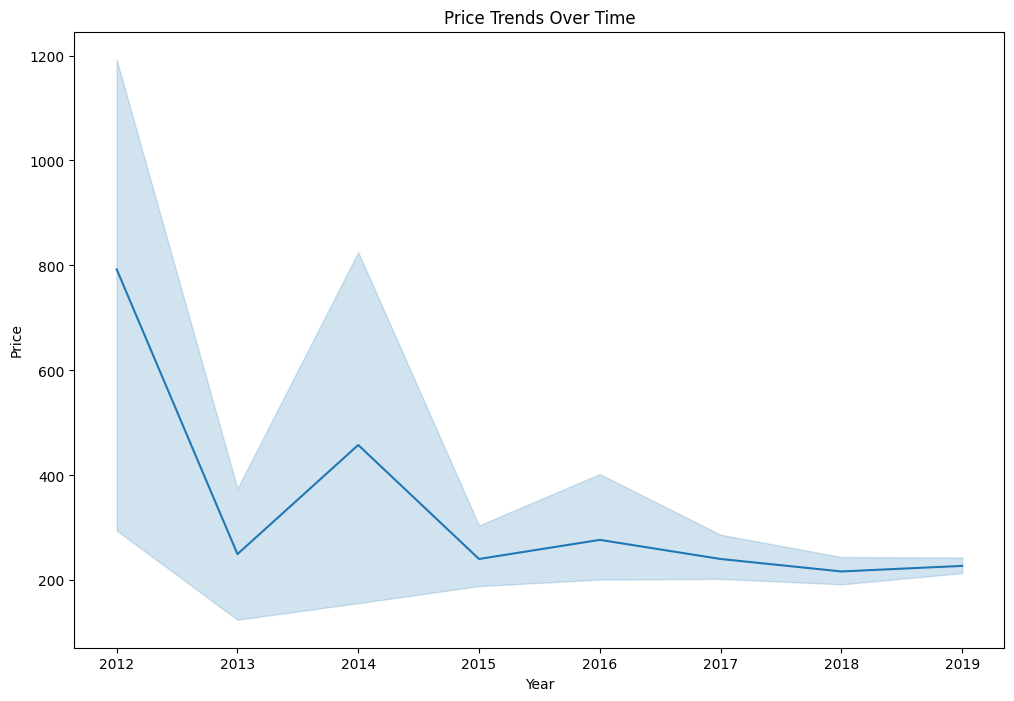

In [44]:
if 'last_review' in Airbnb_df.columns:
    Airbnb_df['last_review'] = pd.to_datetime(Airbnb_df['last_review'], errors='coerce')
    Airbnb_df['year'] = Airbnb_df['last_review'].dt.year
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='year', y='price', data=Airbnb_df)
    plt.title('Price Trends Over Time')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()
else:
    print("last_review column not found")

Price vs. Number of Reviews

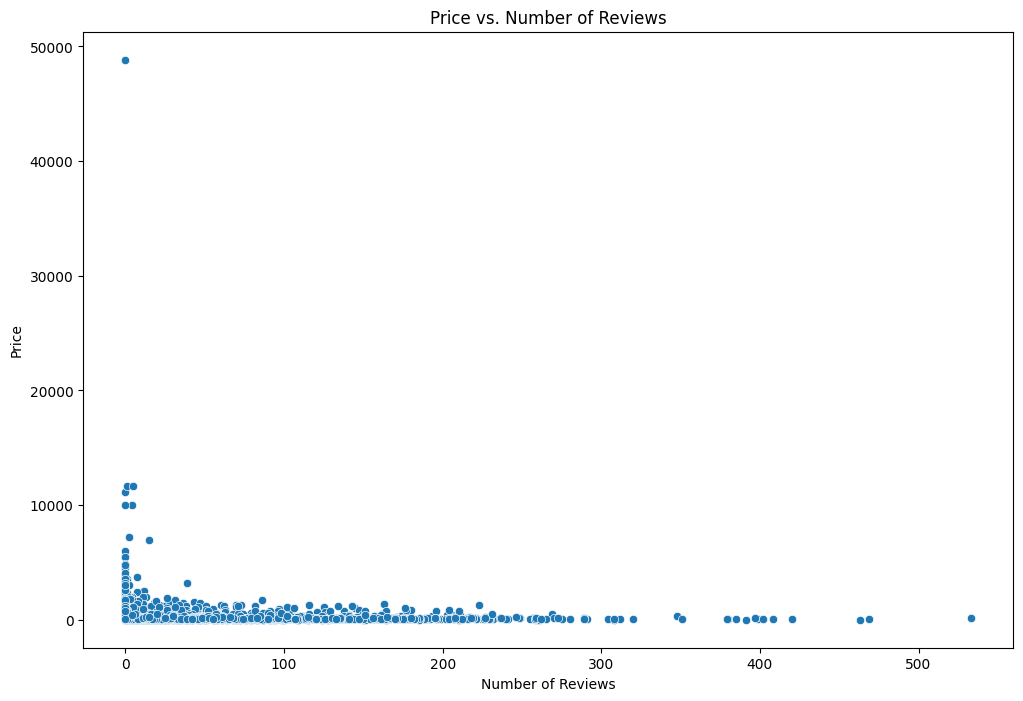

In [46]:
if 'number_of_reviews' in Airbnb_df.columns:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='number_of_reviews', y='price', data=Airbnb_df)
    plt.title('Price vs. Number of Reviews')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Price')
    plt.show()
else:
    print("number_of_reviews column not found")

Feature Engineering: Price per Bedroom

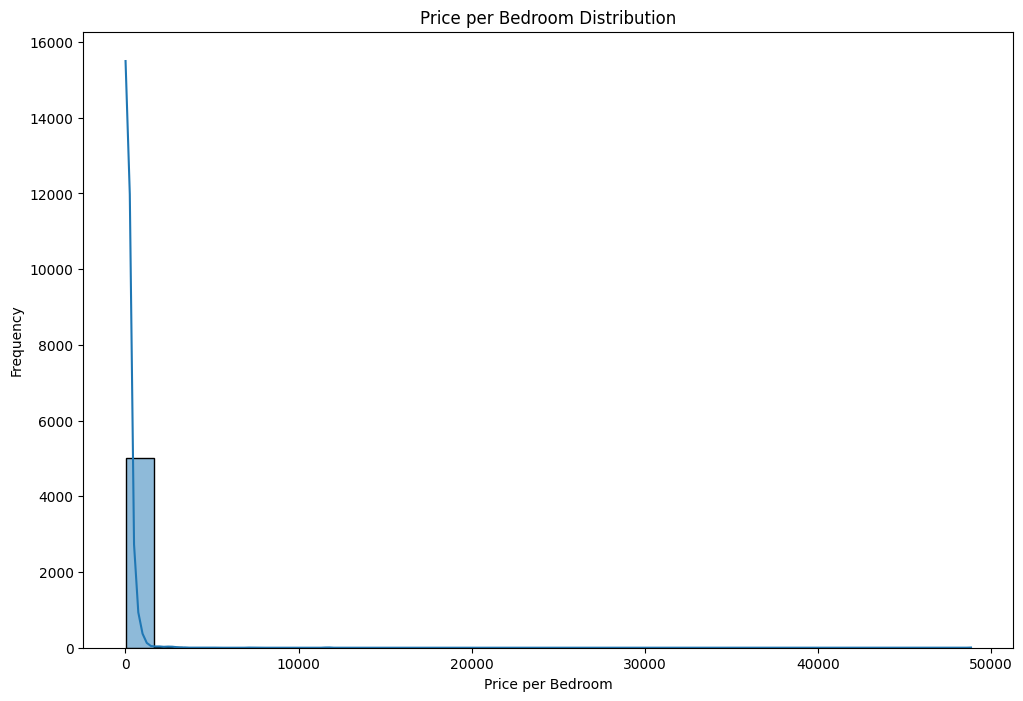

In [49]:
if 'bedrooms' in Airbnb_df.columns and 'price' in Airbnb_df.columns:
    Airbnb_df['price_per_bedroom'] = Airbnb_df['price'] / Airbnb_df['bedrooms'].replace(0, np.nan)
    plt.figure(figsize=(12, 8))
    sns.histplot(Airbnb_df['price_per_bedroom'].dropna(), bins=30, kde=True)
    plt.title('Price per Bedroom Distribution')
    plt.xlabel('Price per Bedroom')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("bedrooms or price column not found")

In [50]:
!pip install streamlit
!pip install pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [51]:
%%writefile app.py
# Importing Libraries
import pandas as pd
import streamlit as st
import plotly.express as px

# Setting up the Streamlit page configuration
st.set_page_config(page_title="Airbnb Data Visualization",
                   page_icon=":house:",
                   layout="wide")

# Title of the Web App
st.title("Airbnb Data Visualization Dashboard")

# Loading the Airbnb dataset
Airbnb_df = pd.read_csv('/content/drive/MyDrive/Air_bnb_data.csv')

# Data Cleaning and Preparation
# Ensure 'price' is treated as a string before cleaning
Airbnb_df['price'] = Airbnb_df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
Airbnb_df['price'] = pd.to_numeric(Airbnb_df['price'], errors='coerce')  # Convert to numeric, coercing errors

# Handle 'availability' column if it contains JSON-like strings
Airbnb_df['availability'] = Airbnb_df['availability'].apply(lambda x: pd.Series(eval(x.replace("'", '"'))).sum() if isinstance(x, str) else x)

# Sidebar - Filters
st.sidebar.header("Filter the data:")

# Filter by Property Type
property_types = sorted(Airbnb_df["property_type"].dropna().unique())
selected_property_types = st.sidebar.multiselect(
    "Select Property Type",
    options=property_types,
    default=property_types
)

# Filter by Room Type
room_types = sorted(Airbnb_df["room_type"].dropna().unique())
selected_room_types = st.sidebar.multiselect(
    "Select Room Type",
    options=room_types,
    default=room_types
)

# Price Range Filter
price_min, price_max = st.sidebar.slider(
    "Select Price Range",
    min_value=float(Airbnb_df["price"].min()),
    max_value=float(Airbnb_df["price"].max()),
    value=(float(Airbnb_df["price"].min()), float(Airbnb_df["price"].max()))
)

# Availability Filter
availability_min, availability_max = st.sidebar.slider(
    "Select Availability Range (days)",
    min_value=int(Airbnb_df["availability"].min()),
    max_value=int(Airbnb_df["availability"].max()),
    value=(int(Airbnb_df["availability"].min()), int(Airbnb_df["availability"].max()))
)

# Filter the DataFrame based on user selection
df_selection = Airbnb_df[
    (Airbnb_df["property_type"].isin(selected_property_types)) &
    (Airbnb_df["room_type"].isin(selected_room_types)) &
    (Airbnb_df["price"] >= price_min) &
    (Airbnb_df["price"] <= price_max) &
    (Airbnb_df["availability"] >= availability_min) &
    (Airbnb_df["availability"] <= availability_max)
]

# Main Page - Visualizations
st.header("Analysis of Airbnb Listings")

# Price Analysis
st.subheader("Price Analysis")

# Price Distribution
fig_price_dist = px.histogram(
    df_selection,
    x="price",
    nbins=50,
    title="Price Distribution of Airbnb Listings"
)
st.plotly_chart(fig_price_dist, use_container_width=True)

# Price by Property Type
fig_price_property = px.box(
    df_selection,
    x="property_type",
    y="price",
    title="Price by Property Type"
)
st.plotly_chart(fig_price_property, use_container_width=True)

# Availability Analysis
st.header("Availability Patterns")

# Availability Distribution
fig_availability_dist = px.histogram(
    df_selection,
    x="availability",
    nbins=50,
    title="Availability Distribution of Airbnb Listings"
)
st.plotly_chart(fig_availability_dist, use_container_width=True)

# Availability by Property Type
fig_availability_property = px.box(
    df_selection,
    x="property_type",
    y="availability",
    title="Availability by Property Type"
)
st.plotly_chart(fig_availability_property, use_container_width=True)

# Location-Based Insights
st.header("Location-Based Insights")

# Neighborhood Overview
st.subheader("Neighborhood Overview")

# Display a few examples of neighborhood_overview
if 'neighborhood_overview' in df_selection.columns:
    st.write(df_selection[['name', 'neighborhood_overview']].head(10))
else:
    st.warning("No 'neighborhood_overview' column found in the dataset.")


Writing app.py


In [2]:
# Install ngrok
!pip install pyngrok
!pip install streamlit


In [1]:
# Import ngrok
from pyngrok import ngrok

# Authenticate ngrok with your token
ngrok.set_auth_token("2iT1S8jORWP8AFT2gipGnOs9RQe_325YotmHc3irE4pTUSuSp")

# Stop any existing ngrok processes. This is important to avoid conflicts with the free account limit.
ngrok.kill()

# Start ngrok to tunnel the Streamlit app
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")

# Run the Streamlit app
!streamlit run app.py &

Streamlit app is live at: NgrokTunnel: "https://e473-34-122-116-180.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.122.116.180:8501



  Stopping...
